# <h1 align="center"><font color="red">Vibration: Time Domain vs Frequency Domain</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

# <font color="gree">Domínio do Tempo</font>

<font color="orange">O `"domínio do tempo"` refere-se à análise de um sinal de vibração em relação ao tempo. Neste domínio, você observa como a amplitude da vibração (geralmente medida em `velocidade`, `aceleração` ou `deslocamento`) varia ao longo do tempo. É a representação mais direta e intuitiva de um sinal de vibração, mostrando o comportamento do sistema mecânico momento a momento.</font>

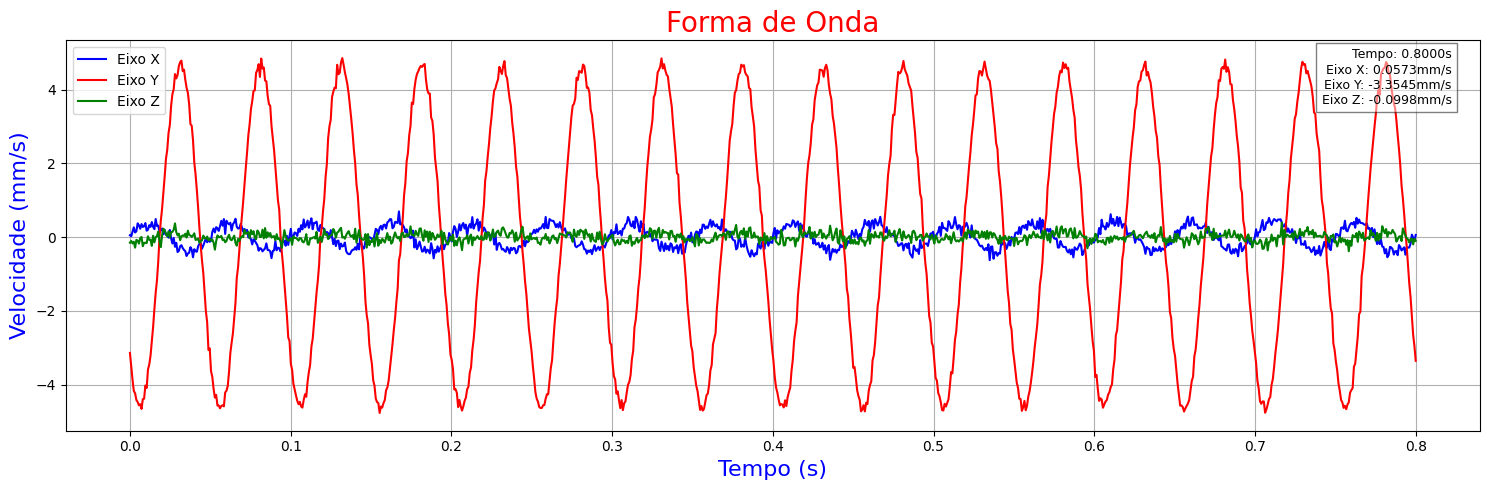

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000)
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Uma onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Criação do gráfico:
plt.figure(figsize=(15, 5))
plt.plot(tempo, x, label='Eixo X', color='blue')
plt.plot(tempo, y, label='Eixo Y', color='red')
plt.plot(tempo, z, label='Eixo Z', color='green')

plt.title('Forma de Onda', c="r", size="20")
plt.xlabel('Tempo (s)', c="b", size="16")
plt.ylabel('Velocidade (mm/s)', c="b", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {tempo[-1]:.4f}s\n'
                     f'Eixo X: {x[-1]:.4f}mm/s\n'
                     f'Eixo Y: {y[-1]:.4f}mm/s\n'
                     f'Eixo Z: {z[-1]:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5)) # gca() significa "get current axes" (obter os eixos atuais).

plt.tight_layout() # plt.tight_layout() é usado no Matplotlib para ajustar automaticamente a posição dos elementos no gráfico, como rótulos, títulos, eixos, legendas, e outros, de maneira que eles não fiquem sobrepostos e sejam exibidos de forma clara.
#plt.savefig('forma_de_onda.jpg')
plt.show()


<font color="red">Alguns Insights:</font>

Na legenda do gráfico:

* `Eixo X`: 0.0573 mm/s

Este é um valor positivo, indicando que naquele instante específico, o movimento no eixo X era na direção considerada `"positiva"`.


* `Eixo Y`: -3.3545 mm/s

Valor negativo, significando movimento na direção "negativa" do eixo Y.


* `Eixo Z`: -0.0998 mm/s

Também negativo, mas com uma magnitude muito menor que o eixo Y.



Estes valores representam a `velocidade instantânea` em cada eixo no último ponto do tempo simulado (`0.8000s`, conforme mostrado no gráfico).

`Interpretação no contexto de vibração`:

* A maior amplitude de vibração está no `eixo Y`, sugerindo que o movimento principal ocorre nesta direção.

* O `eixo X` tem uma vibração moderada.

* O `eixo Z` mostra a menor vibração, indicando movimento mínimo nesta direção.

Esta distribuição de amplitudes entre os eixos pode fornecer pistas sobre a `natureza do problema` ou a `característica da máquina`. Por exemplo:

* Em um `motor horizontal`, vibrações mais altas no `eixo Y (vertical)` podem indicar `desbalanceamento`.

* Vibrações significativas em múltiplos eixos podem sugerir `desalinhamento` ou `problemas de fundação`.

Lembre-se que estes são valores instantâneos e a análise completa requer a observação do padrão ao longo do tempo, bem como a análise no `domínio da frequência`.

# <font color="gree">Domínio de Frequência</font>

Na `Análise de Vibração` e processamento de sinais, o domínio de frequência permite que você veja o conteúdo de frequência de um sinal, em vez de observá-lo no `domínio do tempo`, que apenas mostra como o sinal varia ao longo do tempo. Já o `domínio de frequência` nos dá uma perspectiva de como diferentes frequências contribuem para a composição de um sinal.

`O domínio de frequência é uma representação de um sinal que mostra como a amplitude do sinal varia com a frequência. Em vez de observar como um sinal muda ao longo do tempo, como no domínio do tempo, a análise no domínio da frequência permite identificar quais frequências estão presentes em um sinal e a intensidade dessas frequências. Isso é especialmente útil em análises de vibração, onde as frequências podem indicar problemas mecânicos ou anomalias.`


A `Transformada de Fourier` permite que você decompõe o sinal em suas frequências constituintes. Isso é extremamente útil para identificar frequências que estão presentes em vibrações ou outras formas de movimento periódico, especialmente em casos de `diagnóstico de falhas em manutenção preditiva`.

A seguir vamos aplicar a `Transformada Rápida de Fourier` (FFT) ao mesmo sinal que gerei no domínio do tempo anteriormente.

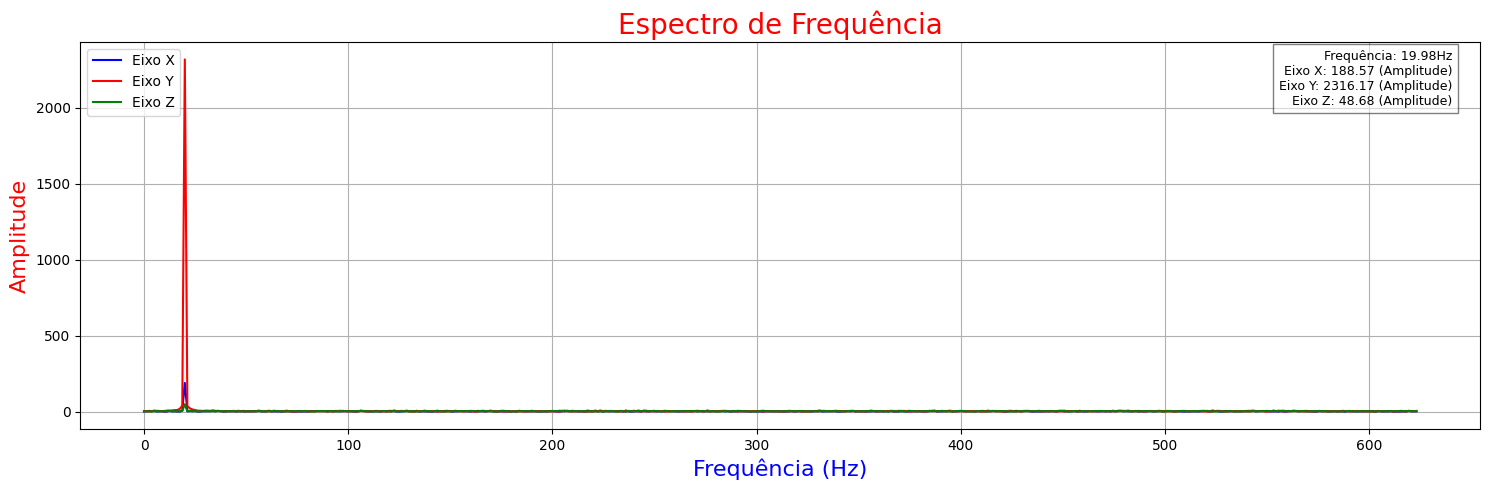

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000) # Testar, invés de 0.8 --> 20 
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Realizando a Transformada Rápida de Fourier (FFT):
fft_x = np.fft.fft(x) # A função np.fft.fft é usada para transformar o sinal do domínio do tempo para o domínio da frequência.
fft_y = np.fft.fft(y) # O resultado da FFT é um número complexo, cuja magnitude (np.abs) representa a amplitude da frequência e a fase pode ser obtida a partir do ângulo do número complexo.
fft_z = np.fft.fft(z)

# Frequências correspondentes:
frequencias = np.fft.fftfreq(len(tempo), d=tempo[1] - tempo[0]) # As frequências correspondentes são obtidas usando np.fft.fftfreq, e apenas as frequências positivas são usadas para o gráfico (uma vez que o espectro é simétrico).

# Tomando apenas a parte positiva das frequências e da FFT (sinal simétrico):
frequencias_positivas = frequencias[:len(frequencias)//2]
fft_x_pos = np.abs(fft_x[:len(fft_x)//2])
fft_y_pos = np.abs(fft_y[:len(fft_y)//2])
fft_z_pos = np.abs(fft_z[:len(fft_z)//2])

# Criação do gráfico no domínio de frequência:
plt.figure(figsize=(15, 5))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color='blue')
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color='red')
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color='green')

plt.title('Espectro de Frequência', c="r", size="20")
plt.xlabel('Frequência (Hz)', c="b", size="16")
plt.ylabel('Amplitude', c="r", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {frequencias_positivas[np.argmax(fft_x_pos)]:.2f}Hz\n'
                     f'Eixo X: {fft_x_pos[np.argmax(fft_x_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Y: {fft_y_pos[np.argmax(fft_y_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Z: {fft_z_pos[np.argmax(fft_z_pos)]:.2f} (Amplitude)',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

#plt.xlim(0, 100)  # Zoom no eixo de frequências
plt.tight_layout()
# plt.savefig('espectro_de_frequencia.jpg')
plt.show()


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Simulação de dados de vibração
def simulate_vibration(t, frequencies, amplitudes):
    signal = np.zeros_like(t)
    for f, a in zip(frequencies, amplitudes):
        signal += a * np.sin(2 * np.pi * f * t)
    return signal


In [86]:
# Parâmetros da simulação
duration = 1.0  # segundos
sample_rate = 1000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)


In [87]:
# Simulando um sinal com múltiplas frequências
frequencies = [10, 50, 120]  # Hz
amplitudes = [0.5, 0.3, 0.2]
vibration_signal = simulate_vibration(t, frequencies, amplitudes)


In [88]:
# Adicionando ruído ao sinal
noise = np.random.normal(0, 0.05, n_samples)
noisy_signal = vibration_signal + noise

In [89]:
# Realizando a Transformada Rápida de Fourier (FFT)
fft_result = fft(noisy_signal)
fft_freq = np.fft.fftfreq(n_samples, 1/sample_rate)

In [90]:
# Calculando a magnitude do espectro
magnitude_spectrum = np.abs(fft_result)

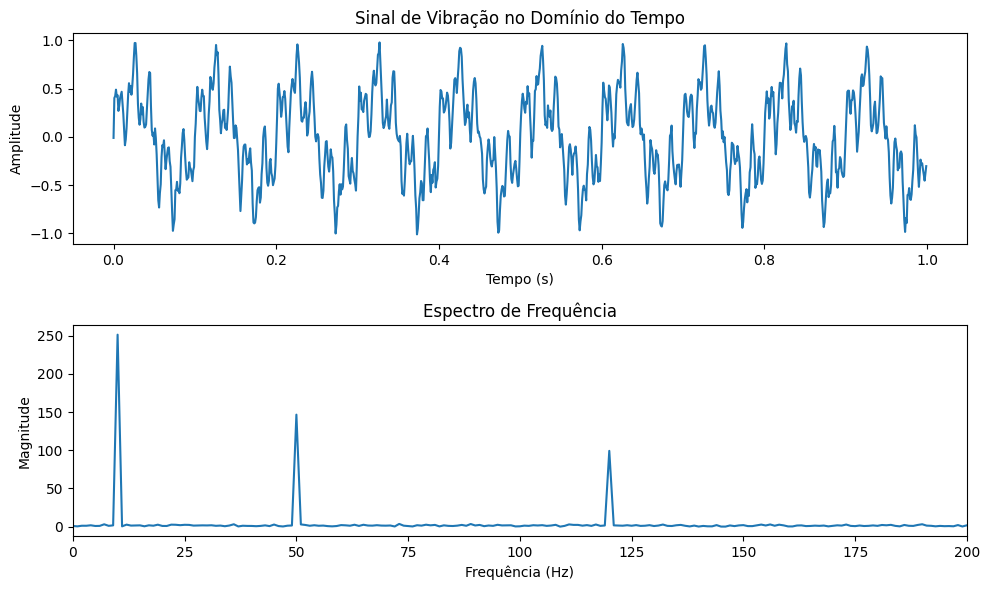

In [91]:
# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Sinal de Vibração no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(fft_freq[:n_samples//2], magnitude_spectrum[:n_samples//2])
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 200)

plt.tight_layout()
plt.show()

In [85]:
from scipy.signal import find_peaks  # Adicionando esta importação

# Identificando as frequências dominantes corretamente
peaks, _ = find_peaks(magnitude_spectrum[:n_samples//2], height=0.1*np.max(magnitude_spectrum[:n_samples//2]))
peak_frequencies = fft_freq[peaks]
peak_frequencies = peak_frequencies[peak_frequencies > 0]  # Removendo frequências negativas ou zero
print("Frequências dominantes detectadas:", np.sort(np.abs(peak_frequencies)))

Frequências dominantes detectadas: [ 10.  50. 120.]


# <font color="gree">Análise Avançada de Vibração - Detecção de Falha em Rolamento</font>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def simulate_vibration(t, base_freq, harmonics, amplitudes, noise_level=0.1):
    signal = np.zeros_like(t)
    for h, a in zip(harmonics, amplitudes):
        signal += a * np.sin(2 * np.pi * base_freq * h * t)
    noise = np.random.normal(0, noise_level, len(t))
    return signal + noise

In [49]:
# Parâmetros da simulação
duration = 1.0  # segundos
sample_rate = 10000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)

In [50]:
# Simulação de vibração normal
normal_freq = 50  # Hz (frequência fundamental da máquina)
normal_harmonics = [1, 2, 3, 4]
normal_amplitudes = [0.5, 0.3, 0.2, 0.1]
normal_signal = simulate_vibration(t, normal_freq, normal_harmonics, normal_amplitudes)

In [51]:
# Simulação de falha de rolamento (estágio avançado)
bearing_fault_freq = 2500  # Hz
fault_harmonics = [1, 2, 3]
fault_amplitudes = [0.9, 0.6, 0.3]  # 9x maior que o normal na frequência fundamental
faulty_signal = normal_signal + simulate_vibration(t, bearing_fault_freq, fault_harmonics, fault_amplitudes, noise_level=0.05)


In [52]:
# Adicionando componentes de outras falhas
belt_fault = 0.2 * np.sin(2 * np.pi * 100 * t)  # Falha em correia
structural_fault = 0.15 * np.sin(2 * np.pi * 500 * t)  # Falha estrutural
electrical_fault = 0.1 * np.sin(2 * np.pi * 1500 * t)  # Falha elétrica

faulty_signal += belt_fault + structural_fault + electrical_fault


In [53]:
# Cálculo do espectro de frequência
def calculate_spectrum(signal):
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(n_samples, 1/sample_rate)
    magnitude = np.abs(fft_result)
    return freq[:n_samples//2], magnitude[:n_samples//2]

In [54]:
freq_normal, mag_normal = calculate_spectrum(normal_signal)
freq_faulty, mag_faulty = calculate_spectrum(faulty_signal)

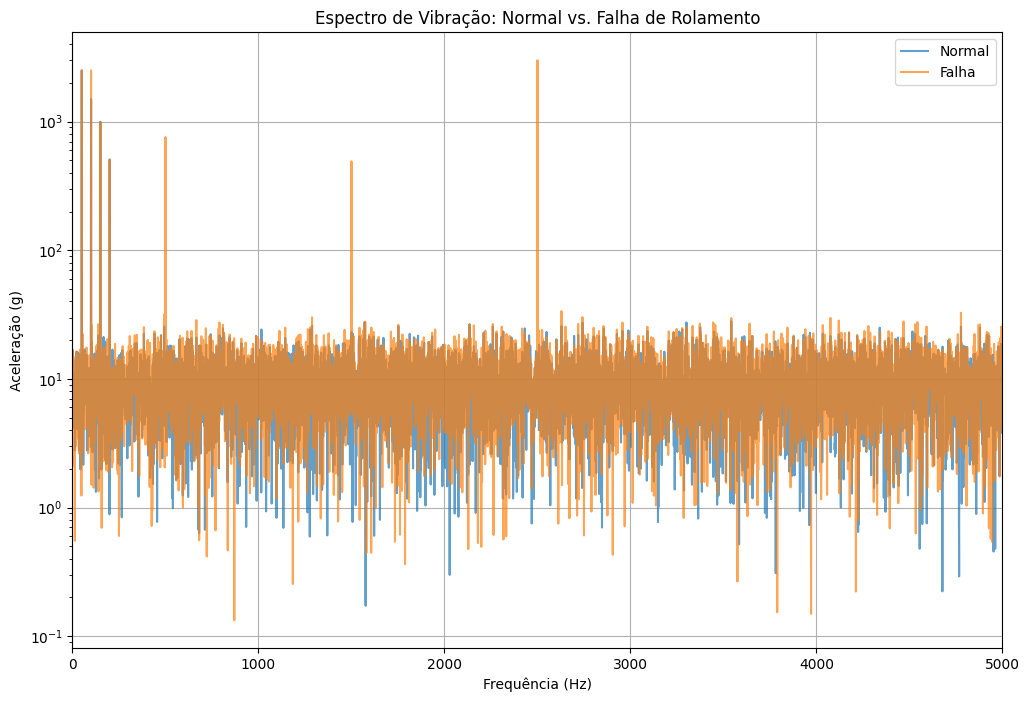

In [55]:
# Plotagem
plt.figure(figsize=(12, 8))
plt.plot(freq_normal, mag_normal, label='Normal', alpha=0.7)
plt.plot(freq_faulty, mag_faulty, label='Falha', alpha=0.7)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Aceleração (g)')
plt.title('Espectro de Vibração: Normal vs. Falha de Rolamento')
plt.legend()
plt.xlim(0, 5000)
plt.yscale('log')
plt.grid(True)

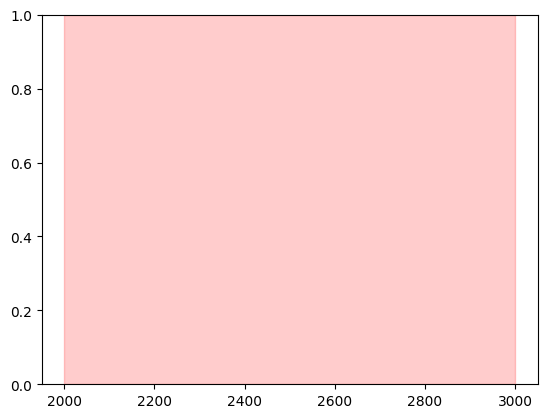

In [56]:
# Destacando a região de falha do rolamento
plt.axvspan(2000, 3000, color='red', alpha=0.2, label='Região de Falha do Rolamento')

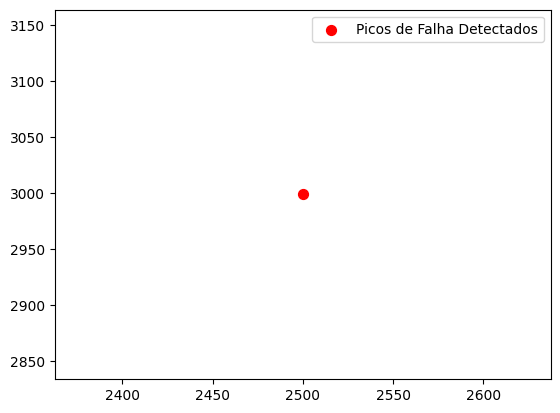

In [57]:
# Detecção de picos na região de falha
peaks, _ = find_peaks(mag_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)], 
                      height=np.max(mag_normal[(freq_normal >= 2000) & (freq_normal <= 3000)]) * 3)
peak_freqs = freq_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)][peaks]
peak_mags = mag_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)][peaks]

plt.scatter(peak_freqs, peak_mags, color='red', s=50, zorder=5, label='Picos de Falha Detectados')

plt.legend()
plt.show()

In [58]:
# Análise dos picos detectados
print("Picos de falha detectados:")
for freq, mag in zip(peak_freqs, peak_mags):
    normal_mag = np.interp(freq, freq_normal, mag_normal)
    ratio = mag / normal_mag
    print(f"Frequência: {freq:.2f} Hz, Amplitude: {mag:.2e} g, {ratio:.1f}x maior que o normal")

Picos de falha detectados:
Frequência: 2500.00 Hz, Amplitude: 3.00e+03 g, 236.7x maior que o normal


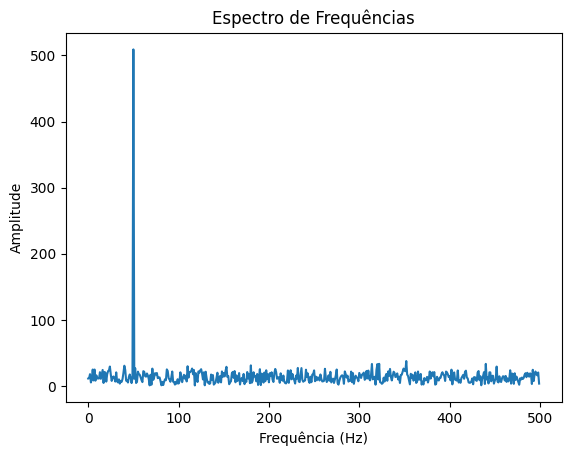

Acurácia do Classificador: 90.00%


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exemplo de sinal de vibração simulado (seno + ruído)
fs = 1000  # Frequência de amostragem
t = np.arange(0, 1, 1/fs)
freq = 50  # Frequência do sinal
sinal_vibracao = np.sin(2 * np.pi * freq * t) + 0.5 * np.random.randn(len(t))

# FFT para análise espectral
fft_resultado = fft(sinal_vibracao)
frequencias = np.fft.fftfreq(len(t), 1/fs)

# Exibir o espectro
plt.plot(frequencias[:len(frequencias)//2], np.abs(fft_resultado[:len(frequencias)//2]))
plt.title("Espectro de Frequências")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.show()

# Simulação de dados de vibração para classificação
# Suponha que temos dois tipos de sinais de vibração: saudáveis e com falha
n_amostras = 100
X = []
y = []

for i in range(n_amostras):
    if i < n_amostras // 2:
        # Sinal saudável
        sinal = np.sin(2 * np.pi * freq * t) + 0.5 * np.random.randn(len(t))
        y.append(0)  # Classe saudável
    else:
        # Sinal com falha (com uma frequência extra)
        freq_falha = 120
        sinal = np.sin(2 * np.pi * freq * t) + np.sin(2 * np.pi * freq_falha * t) + 0.5 * np.random.randn(len(t))
        y.append(1)  # Classe falha
    fft_sinal = fft(sinal)
    X.append(np.abs(fft_sinal[:len(frequencias)//2]))  # Usar a magnitude do espectro

# Transformar em arrays
X = np.array(X)
y = np.array(y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classificador Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Previsão
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do Classificador: {accuracy * 100:.2f}%")


Acurácia do Classificador: 80.67%


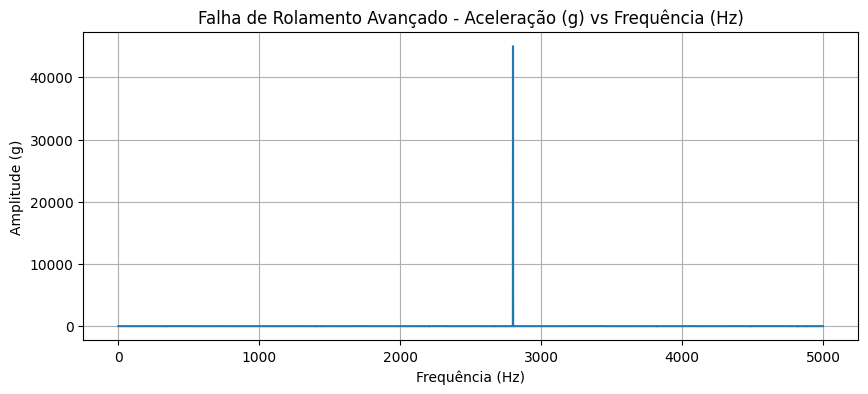

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Parâmetros do sinal
fs = 10000  # Frequência de amostragem
t = np.arange(0, 1, 1/fs)  # 1 segundo de amostragem

# Sinais normais (sem falha)
def gerar_sinal_normal(freq, t):
    return np.sin(2 * np.pi * freq * t) + 0.1 * np.random.randn(len(t))

# Falha em rolamento (estágio avançado e prematuro)
def falha_rolamento(t, estagio):
    if estagio == "prematuro":
        freq_falha = 2200  # Estágio prematuro
    else:
        freq_falha = 2800  # Estágio avançado
    return 9 * np.sin(2 * np.pi * freq_falha * t) + 0.1 * np.random.randn(len(t))

# Falha de correia (frequências mais baixas)
def falha_correia(t):
    freq_falha = 700
    return 5 * np.sin(2 * np.pi * freq_falha * t) + 0.1 * np.random.randn(len(t))

# Falhas estruturais (baixa frequência)
def falha_estrutural(t):
    freq_falha = 300
    return 4 * np.sin(2 * np.pi * freq_falha * t) + 0.1 * np.random.randn(len(t))

# Falhas elétricas (alta frequência)
def falha_eletrica(t):
    freq_falha = 4000
    return 6 * np.sin(2 * np.pi * freq_falha * t) + 0.1 * np.random.randn(len(t))

# Falhas de lubrificação (média frequência)
def falha_lubrificacao(t):
    freq_falha = 1800
    return 3 * np.sin(2 * np.pi * freq_falha * t) + 0.1 * np.random.randn(len(t))

# Criar dataset de sinais
def criar_dataset(n_amostras):
    X = []
    y = []
    for _ in range(n_amostras):
        tipo_falha = np.random.choice(["normal", "rolamento_prematuro", "rolamento_avancado", "correia", "estrutural", "eletrica", "lubrificacao"])
        
        if tipo_falha == "normal":
            sinal = gerar_sinal_normal(100, t)
        elif tipo_falha == "rolamento_prematuro":
            sinal = falha_rolamento(t, "prematuro")
        elif tipo_falha == "rolamento_avancado":
            sinal = falha_rolamento(t, "avancado")
        elif tipo_falha == "correia":
            sinal = falha_correia(t)
        elif tipo_falha == "estrutural":
            sinal = falha_estrutural(t)
        elif tipo_falha == "eletrica":
            sinal = falha_eletrica(t)
        elif tipo_falha == "lubrificacao":
            sinal = falha_lubrificacao(t)
        
        fft_sinal = np.abs(fft(sinal))[:len(t)//2]  # FFT e apenas a metade positiva
        X.append(fft_sinal)
        y.append(tipo_falha)
    
    return np.array(X), np.array(y)

# Gerar dados
n_amostras = 500
X, y = criar_dataset(n_amostras)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar classificador Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do Classificador: {accuracy * 100:.2f}%")

# Plotar um exemplo de sinal e seu espectro
plt.figure(figsize=(10, 4))

# Exemplo de sinal de rolamento avançado
sinal_exemplo = falha_rolamento(t, "avancado")
fft_exemplo = np.abs(fft(sinal_exemplo))[:len(t)//2]
frequencias = np.fft.fftfreq(len(t), 1/fs)[:len(t)//2]

# Gráfico de Aceleração vs Frequência
plt.plot(frequencias, fft_exemplo)
plt.title('Falha de Rolamento Avançado - Aceleração (g) vs Frequência (Hz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (g)')
plt.grid(True)
plt.show()
